Data source: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'twitchdata.csv'
data = pd.read_csv(filename)
print(data.head())

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

In [25]:
numeric = data.select_dtypes(include = 'int64').columns.to_list()
print(numeric)
categoric = data.select_dtypes(exclude = 'int64').columns.to_list()
print(categoric)

['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained']
['Channel', 'Partnered', 'Mature', 'Language']


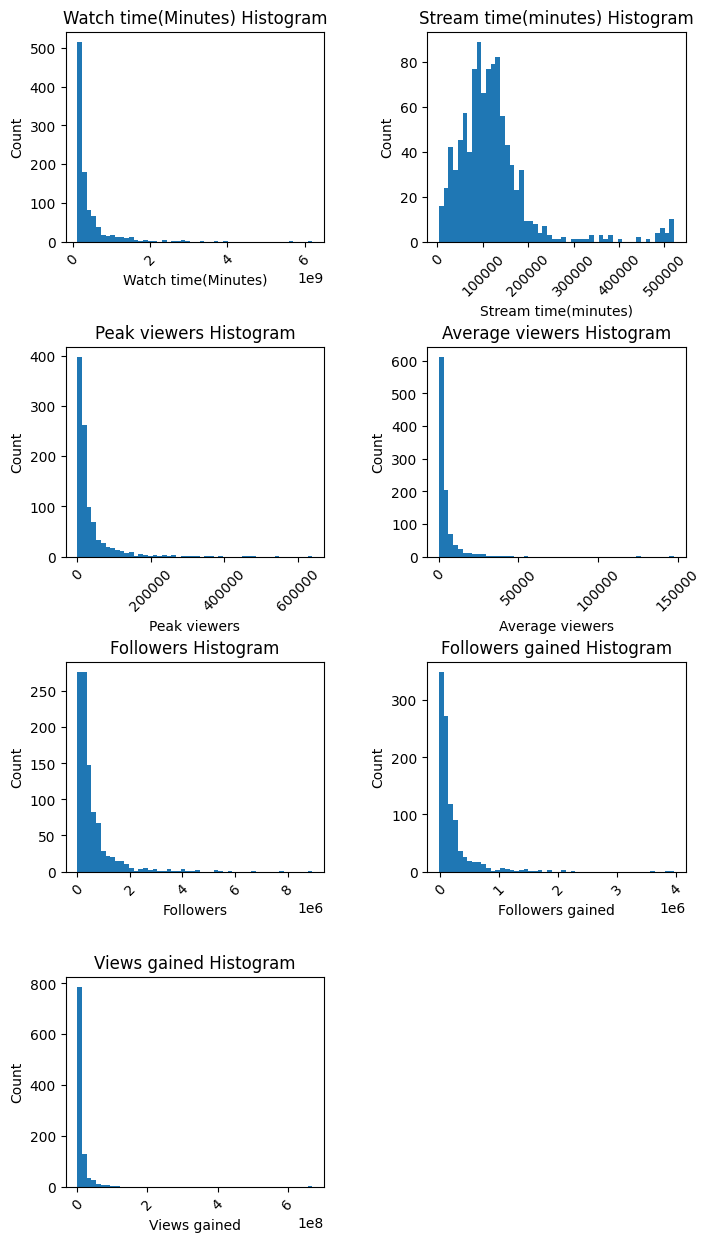

In [80]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    ax[y][x].hist(data[col], bins=50)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

It's pretty clear most of these have severe outliers.

C:\Users\vi\AppData\Local\Temp\ipykernel_19820\4065989087.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data[numeric], labels=data[numeric].columns, )


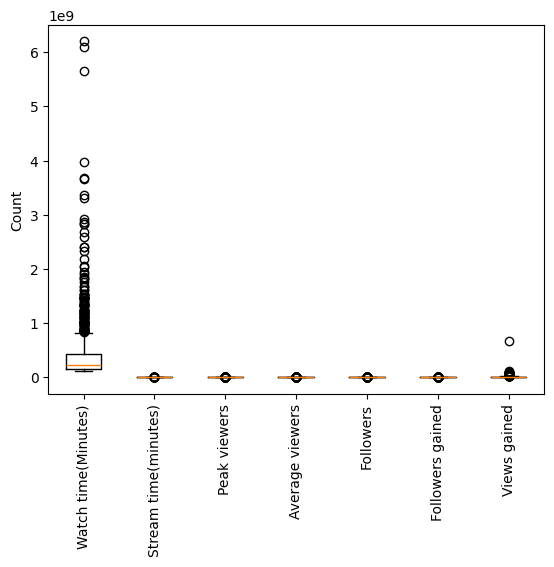

In [ ]:
fix, ax = plt.subplots()
ax.boxplot(data[numeric], labels=data[numeric].columns)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Count")
plt.show()

Watch time makes the other box plots impossible to see. Let's just look at them individually

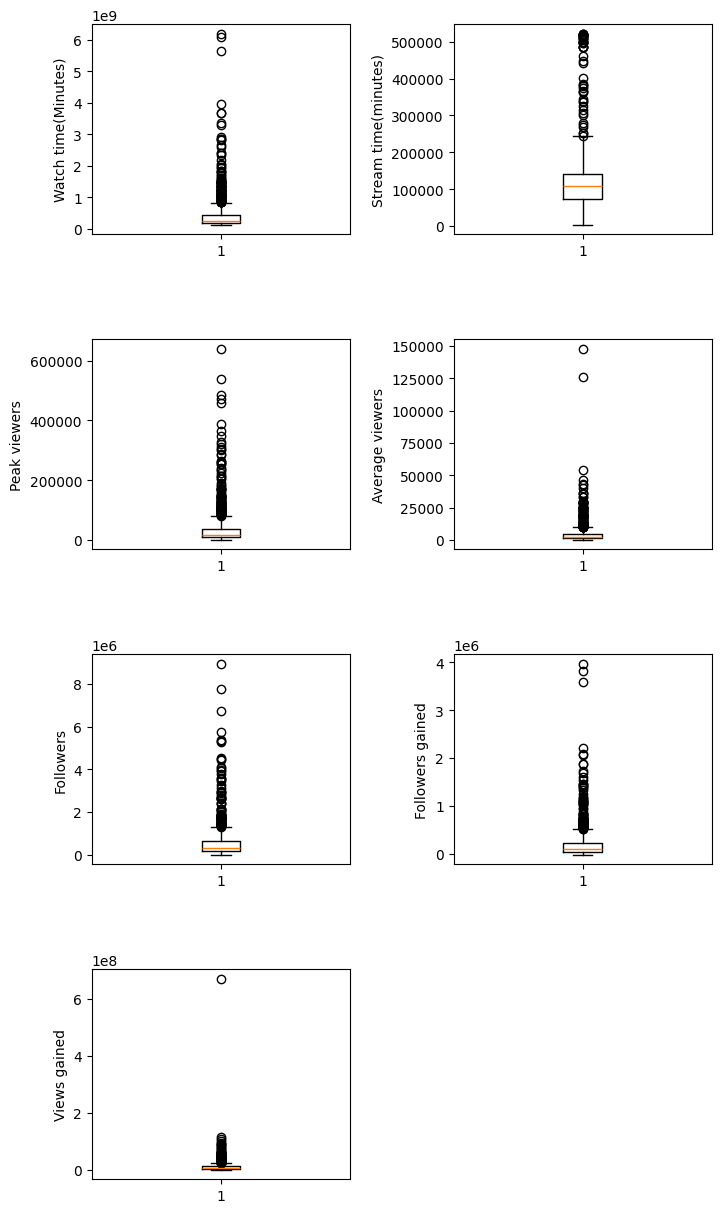

In [90]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    ax[y][x].boxplot(data[col])
    ax[y][x].set_ylabel(col)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

It's clear that not only are there a lot of outliers, but they are extremely large numbers compared to the interquartile. Let's see what the distributions look like without the upper 75%. The lower 25% seems to be fine, but we need to graph it to see.

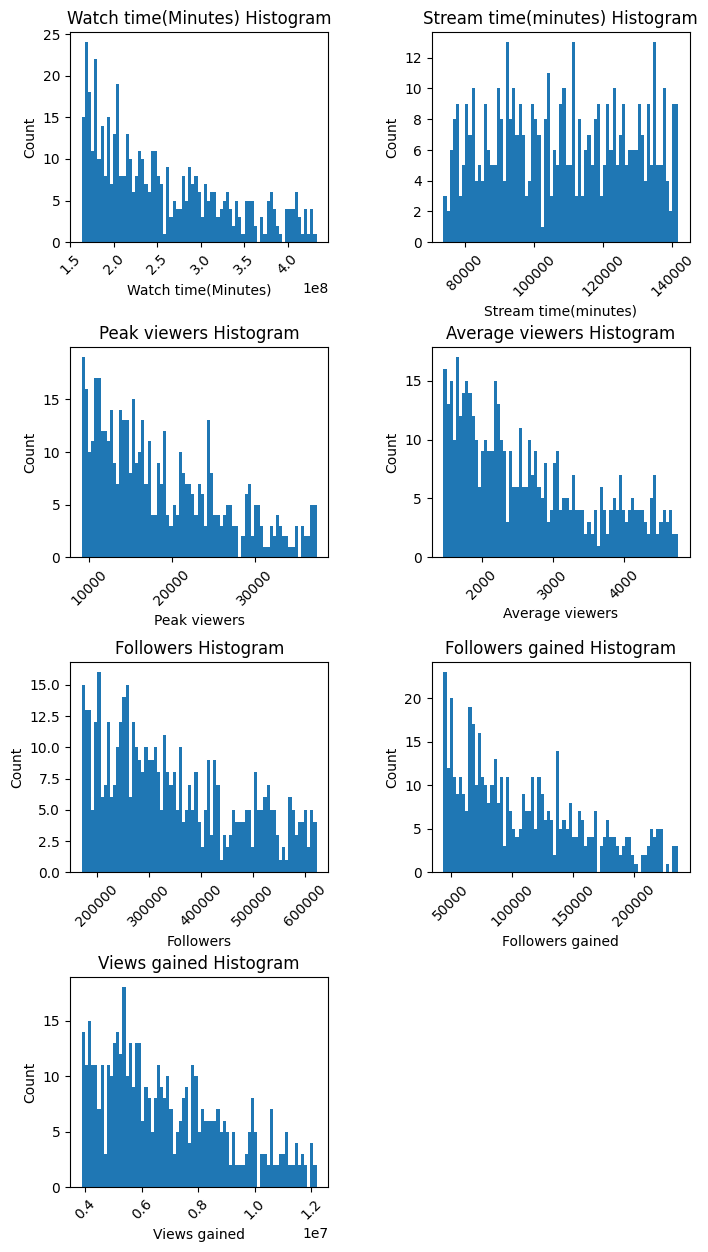

In [108]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    upper = data[col].quantile(0.75)
    lower = data[col].quantile(0.25)

    inner = data[(upper >= data[col]) & (data[col] >= lower)]
    ax[y][x].hist(inner[col], bins=75)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

Streamtime being flat seems very interesting. It appears to be independent of channel size.

Let's only remove the 75 quantile next:

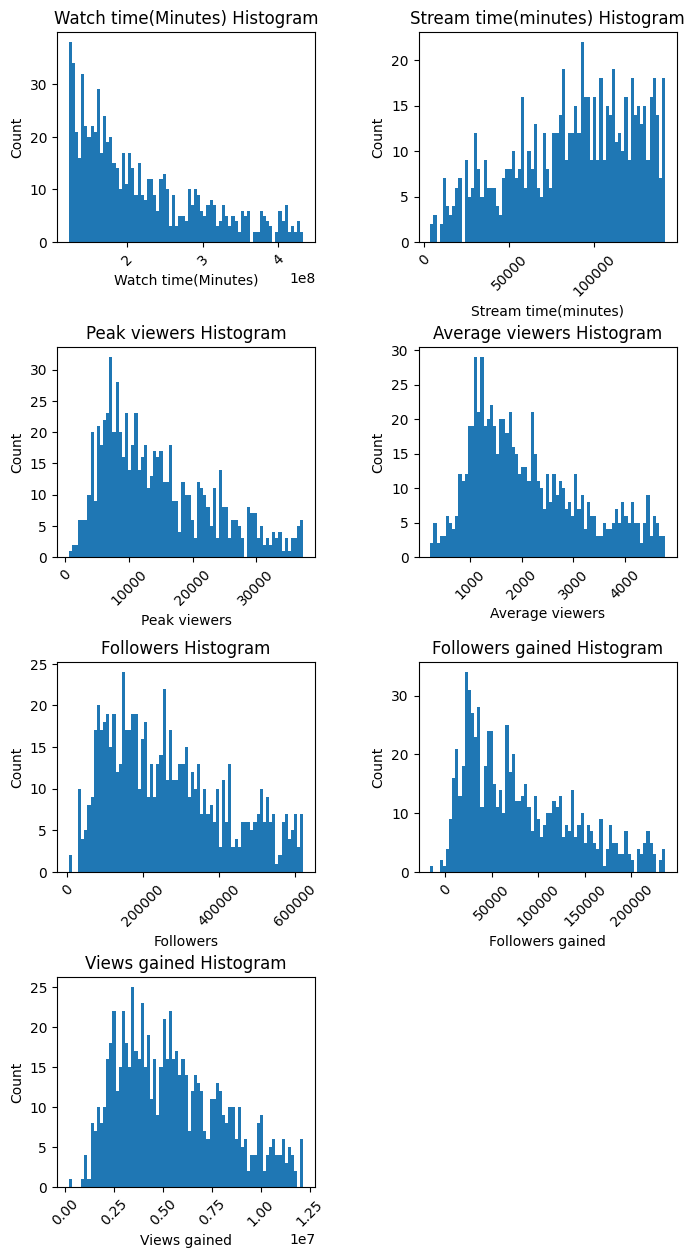

In [107]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    upper = data[col].quantile(0.75)
    lower = data[col].quantile(0.25)

    inner = data[upper >= data[col]]
    ax[y][x].hist(inner[col], bins=75)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

The count decreasing the metric increases makes sense. There are naturally less large channels than there are small ones. It is hard to say for sure why the 25th quantile is less, but one guess is that the dataset is not representative of the entire twitch userbase. Therefore, if it only includes "larger" channels, then it would make sense fewer channels in the dataset would be represent the lower end of follower and viewer counts.

In [124]:
for col in numeric:
    print(f"Data on {col}:")
    print(f"Mean: {data[col].mean()}")
    print(f"Median: {data[col].median()}")
    print(f"Min: {data[col].min()}")
    print(f"Max: {data[col].max()}")
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    inner = data[(upper < data[col]) | (data[col] < lower)]
    print(f"Number of outliers: {inner[col].count()}/{data[col].count()}")

    print('\n')

Data on Watch time(Minutes):
Mean: 418427930.13
Median: 234990787.5
Min: 122192850
Max: 6196161750
Number of outliers: 107/1000


Data on Stream time(minutes):
Mean: 120515.16
Median: 108240.0
Min: 3465
Max: 521445
Number of outliers: 48/1000


Data on Peak viewers:
Mean: 37065.051
Median: 16676.0
Min: 496
Max: 639375
Number of outliers: 113/1000


Data on Average viewers:
Mean: 4781.04
Median: 2425.0
Min: 235
Max: 147643
Number of outliers: 100/1000


Data on Followers:
Mean: 570054.068
Median: 318063.0
Min: 3660
Max: 8938903
Number of outliers: 89/1000


Data on Followers gained:
Mean: 205518.534
Median: 98352.0
Min: -15772
Max: 3966525
Number of outliers: 90/1000


Data on Views gained:
Mean: 11668165.613
Median: 6456323.5
Min: 175788
Max: 670137548
Number of outliers: 91/1000


